1. What does R-squared represent in a regression model?
Ans. R-squared, or the coefficient of determination, represents the proportion of the variance in the dependent variable that is explained by the independent variables in the model. Its value ranges from 0 to 1:

0: The model explains none of the variability in the data.
1: The model explains all the variability in the data.

2. What are the assumptions of linear regression?
Ans. Linearity: The relationship between the independent and dependent variables is linear.
Independence: Observations are independent of each other.
Homoscedasticity: The variance of residuals is constant across all levels of the independent variable(s).
Normality of residuals: Residuals are normally distributed.
No multicollinearity: Independent variables are not highly correlated with each other.

3. What is the difference between R-squared and Adjusted R-squared?
Ans. R-squared: Measures the proportion of variance explained by the model but increases with the addition of variables, regardless of their significance.
Adjusted R-squared: Adjusts R-squared to account for the number of predictors, penalizing the inclusion of irrelevant variables. It provides a more accurate measure of model performance.

4. Why do we use Mean Squared Error (MSE)?
Ans. MSE is used to measure the average squared difference between the predicted and actual values. It penalizes larger errors more than smaller ones, making it sensitive to outliers and suitable for optimization in regression models.

5. What does an Adjusted R-squared value of 0.85 indicate?
Ans. An Adjusted R-squared of 0.85 indicates that 85% of the variance in the dependent variable is explained by the independent variables, accounting for the number of predictors. It suggests a good fit but may still include some bias if assumptions are violated.

6. How do we check for normality of residuals in linear regression?
Ans. Histogram: Plot the residuals to see if they follow a bell-shaped curve.
Q-Q Plot: Compare the quantiles of residuals against a normal distribution.
Statistical Tests: Use the Shapiro-Wilk or Kolmogorov-Smirnov test for normality.

7. What is multicollinearity, and how does it impact regression?
Ans. Definition: Multicollinearity occurs when independent variables are highly correlated.
Impact:
Inflates standard errors of coefficients.
Reduces the reliability of coefficient estimates.
Makes it hard to determine the effect of each predictor.

8. What is Mean Absolute Error (MAE)?
Ans. MAE measures the average absolute difference between predicted and actual values. It gives equal weight to all errors, making it less sensitive to outliers compared to MSE.

9. What are the benefits of using an ML pipeline?
Ans. Consistency: Ensures reproducible workflows.
Modularity: Allows for step-by-step transformations (e.g., preprocessing, feature selection, modeling).
Efficiency: Automates repetitive tasks.
Scalability: Easily adapts to new data or model updates.

10. Why is RMSE considered more interpretable than MSE?
Ans. RMSE is the square root of MSE, making it interpretable in the same unit as the dependent variable. It provides a direct measure of average prediction error.

11. What is pickling in Python, and how is it useful in ML?
Ans. Pickling serializes Python objects (e.g., ML models) into a binary format for storage. It's useful for saving trained models and reusing them without retraining.

12. What does a high R-squared value mean?
Ans. A high R-squared value indicates that the model explains a large portion of the variance in the dependent variable. However, it does not guarantee model quality, as it may overfit the data.

13. What happens if linear regression assumptions are violated?
Ans. Linearity: Leads to biased predictions.
Homoscedasticity: Reduces model efficiency and increases the risk of Type I errors.
Normality: Affects confidence intervals and hypothesis tests.
Independence: Results in unreliable standard errors and p-values.
Multicollinearity: Causes unstable coefficients.

14. How can we address multicollinearity in regression?
Ans. Remove highly correlated predictors.
Use regularization techniques like Ridge or Lasso regression.
Perform Principal Component Analysis (PCA) to reduce dimensionality.

15. How can feature selection improve model performance in regression analysis?
Ans. Feature selection reduces overfitting, improves interpretability, and enhances generalization by keeping only the most relevant predictors.

16. How is Adjusted R-squared calculated?
Ans. Adjusted R-squared formula:

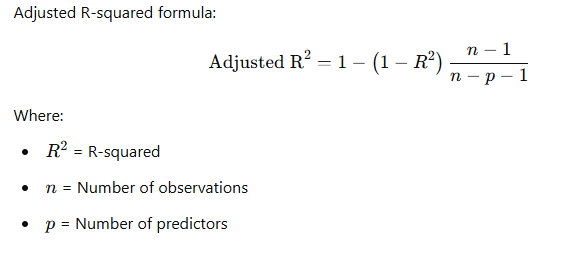

17. Why is MSE sensitive to outliers?
Ans. MSE squares the errors, which amplifies the impact of large errors caused by outliers, making it unsuitable when outliers are present.

18. What is the role of homoscedasticity in linear regression?
Ans. Homoscedasticity ensures that residuals have constant variance. Violating this assumption leads to inefficient estimates and unreliable statistical tests.

19. What is Root Mean Squared Error (RMSE)?
Ans. RMSE is the square root of the average squared difference between predicted and actual values. It measures the typical error magnitude in the same unit as the dependent variable.

20. Why is pickling considered risky?
Ans. Pickling can execute arbitrary code during deserialization, making it vulnerable to malicious attacks if untrusted data is used.

21. What alternatives exist to pickling for saving ML models?
Ans. Joblib: Faster for large numpy arrays.
ONNX: An open format for ML models.
PMML: For sharing models across platforms.
JSON: For storing lightweight models.

22. What is heteroscedasticity, and why is it a problem?
Ans. Heteroscedasticity occurs when residuals have non-constant variance. It leads to inefficient estimates, biased confidence intervals, and unreliable hypothesis tests.

23. How can interaction terms enhance a regression model's predictive power?
Ans. Interaction terms capture the combined effect of two or more predictors, allowing the model to account for non-linear relationships between variables.

#Practical Question:
1. Visualize the distribution of errors (residuals) using Seaborn's "diamonds" dataset.

In [ ]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
diamonds = sns.load_dataset('diamonds')

# Select numeric columns for regression
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = diamonds['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Plot distribution of residuals
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()


2. Calculate and print MSE, MAE, and RMSE

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


3. Check assumptions of linear regression

In [ ]:
# Linearity
sns.pairplot(diamonds[['price', 'carat', 'depth', 'table']])
plt.show()

# Residuals plot for homoscedasticity
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# Correlation matrix for multicollinearity
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


4. Create an ML pipeline with feature scaling and evaluate regression models

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_val_score

# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Evaluate with cross-validation
scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
print(f"Linear Regression R-squared: {scores.mean():.4f}")

# Ridge Regression
pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge())
])
ridge_scores = cross_val_score(pipeline_ridge, X, y, cv=5, scoring='r2')
print(f"Ridge Regression R-squared: {ridge_scores.mean():.4f}")


5. Simple Linear Regression with coefficients, intercept, and R-squared

In [ ]:
from sklearn.metrics import r2_score

# Fit simple linear regression
model.fit(X[['carat']], y)

# Print coefficients and R-squared
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
print(f"R-squared: {r2_score(y, model.predict(X[['carat']]))}")


6. Analyze the relationship between total bill and tip (Seaborn "tips" dataset)

In [ ]:
# Load tips dataset
tips = sns.load_dataset('tips')

# Simple Linear Regression
X = tips[['total_bill']]
y = tips['tip']
model.fit(X, y)

# Plot regression line
sns.regplot(x='total_bill', y='tip', data=tips, line_kws={'color': 'red'})
plt.title("Total Bill vs. Tip")
plt.show()


7. Fit a linear regression model to synthetic data and plot

In [ ]:
from sklearn.datasets import make_regression

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Fit model
model.fit(X, y)

# Plot data and regression line
plt.scatter(X, y, label="Data")
plt.plot(X, model.predict(X), color='red', label="Regression Line")
plt.legend()
plt.show()


8. Pickle a trained linear regression model

In [ ]:
import pickle

# Save model
with open('linear_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Load model
with open('linear_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

print("Model loaded successfully!")


9. Fit a polynomial regression model (degree 2) and plot

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit polynomial regression
model.fit(X_poly, y)

# Plot regression curve
plt.scatter(X, y)
plt.plot(X, model.predict(X_poly), color='red')
plt.title("Polynomial Regression (Degree 2)")
plt.show()


10. Generate synthetic data for simple linear regression and fit a model

In [ ]:
# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Fit model
model.fit(X, y)

# Print coefficients and intercept
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")


11. Fit polynomial regression models of different degrees and compare performance

In [ ]:
degrees = [1, 2, 3, 4]
from sklearn.model_selection import cross_val_score

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model.fit(X_poly, y)
    score = cross_val_score(model,X_poly).sum()


12. Simple linear regression with two features

In [ ]:
# Generate synthetic data with two features
X, y = make_regression(n_samples=100, n_features=2, noise=10, random_state=42)

# Fit model
model.fit(X, y)

# Print coefficients, intercept, and R-squared
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"R-squared: {model.score(X, y)}")


13. Generate synthetic data and visualize regression line

In [ ]:
# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

# Fit model
model.fit(X, y)

# Plot data points and regression line
plt.scatter(X, y, label="Data")
plt.plot(X, model.predict(X), color='red', label="Regression Line")
plt.legend()
plt.title("Linear Regression on Synthetic Data")
plt.show()


14. Check for multicollinearity using VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Example dataset
data = pd.DataFrame(X, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5'])

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = data.columns
vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

print(vif_data)


15. Generate synthetic data for a degree-4 polynomial and fit a model

In [ ]:
# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
y = y**2  # Making the data polynomial

# Fit polynomial regression
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
model.fit(X_poly, y)

# Plot regression curve
plt.scatter(X, y, label="Data")
plt.plot(X, model.predict(X_poly), color='red', label="Polynomial Curve")
plt.legend()
plt.title("Polynomial Regression (Degree 4)")
plt.show()


16. ML pipeline with data standardization and multiple linear regression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Fit and evaluate pipeline
pipeline.fit(X, y)
r2_score = pipeline.score(X, y)
print(f"R-squared: {r2_score:.4f}")


17. Polynomial regression (degree 3) on synthetic data

In [ ]:
# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Fit polynomial regression
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
model.fit(X_poly, y)

# Plot regression curve
plt.scatter(X, y, label="Data")
plt.plot(X, model.predict(X_poly), color='red', label="Polynomial Curve")
plt.legend()
plt.title("Polynomial Regression (Degree 3)")
plt.show()


18. Multiple linear regression on synthetic data with 5 features

In [ ]:
# Generate synthetic data with 5 features
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

# Fit model
model.fit(X, y)

# Print R-squared and coefficients
print(f"R-squared: {model.score(X, y):.4f}")
print(f"Coefficients: {model.coef_}")


19. Generate synthetic data, fit, and visualize regression line

In [ ]:
# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Fit model
model.fit(X, y)

# Plot regression line
plt.scatter(X, y, label="Data")
plt.plot(X, model.predict(X), color='red', label="Regression Line")
plt.legend()
plt.title("Regression Line Visualization")
plt.show()


20. Multiple linear regression with 3 features

In [ ]:
# Generate synthetic data with 3 features
X, y = make_regression(n_samples=100, n_features=3, noise=10, random_state=42)

# Fit model
model.fit(X, y)

# Print R-squared and coefficients
print(f"R-squared: {model.score(X, y):.4f}")
print(f"Coefficients: {model.coef_}")


21. Serialize and deserialize using joblib

In [ ]:
import joblib

# Save model
joblib.dump(model, 'linear_model.joblib')

# Load model
loaded_model = joblib.load('linear_model.joblib')
print("Model loaded successfully!")


22. Linear regression with categorical features using one-hot encoding

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Load tips dataset
tips = sns.load_dataset('tips')

# Separate features and target
X = tips[['total_bill', 'sex', 'smoker', 'day']]
y = tips['tip']

# Apply one-hot encoding to categorical columns
column_transformer = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), ['sex', 'smoker', 'day'])],
    remainder='passthrough'
)
X_transformed = column_transformer.fit_transform(X)

# Fit model
model.fit(X_transformed, y)
print(f"R-squared: {model.score(X_transformed, y):.4f}")


23. Compare Ridge Regression with Linear Regression

In [ ]:
from sklearn.linear_model import Ridge

# Fit Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X, y)

# Compare R-squared and coefficients
print(f"Linear Regression R-squared: {model.score(X, y):.4f}")
print(f"Ridge Regression R-squared: {ridge_model.score(X, y):.4f}")
print(f"Linear Coefficients: {model.coef_}")
print(f"Ridge Coefficients: {ridge_model.coef_}")


24. Cross-validation for linear regression

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-validated R-squared: {scores.mean():.4f}")


25. Compare polynomial regression models of different degrees

In [ ]:
for degree in range(1, 5):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model.fit(X_poly, y)
    score = model.score(X_poly, y)
    print(f"Degree {degree}: R-squared = {score:.4f}")
